Binning time data
averaging a daily value from the data
countour lines on the map
setting up git hub repository


In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import pandas as pd
import datetime
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cigmt
from maptools import load_crm_asc
from maptools import make_map

In [14]:
file = 'sf_os_46026.txt'
file1 = 'sf_ns_PRYC1.txt'
sfos = pd.read_csv(file,skiprows=1,na_values=[99.00,999,999.0],delim_whitespace=True,engine='python')
sfns = pd.read_csv(file1,skiprows=1,na_values=[99.99,999,999.0],delim_whitespace=True,engine='python')

In [15]:
print('sfos head')
print(sfos.head())
print('sfns head')
print(sfns.head())
print('sfos.keys')
print(sfos.keys())
print('sfns keys')
print(sfns.keys())

sfos head
     yr  mo  dy  hr  mn   degT  m/s  m/s.1     m    sec  sec.1  degT.1  \
0  2016  12  31  23  50  359.0  2.0    2.7  1.72  12.12   7.81   283.0   
1  2017   1   1   0  50  307.0  4.7    5.8  1.84  12.12   8.58   285.0   
2  2017   1   1   1  50  298.0  5.3    6.5  1.86  13.79   8.21   275.0   
3  2017   1   1   2  50  296.0  5.2    6.4  1.87  12.12   7.79   296.0   
4  2017   1   1   3  50  288.0  4.7    5.7  1.75  11.43   7.59   297.0   

      hPa  degC  wtmp  degC.1  mi  ft  
0  1014.1  10.3  10.8     NaN NaN NaN  
1  1014.3  10.1  10.8     NaN NaN NaN  
2  1014.8  10.2  10.8     NaN NaN NaN  
3  1014.9  10.4  10.7     NaN NaN NaN  
4  1014.7  10.5  10.7     NaN NaN NaN  
sfns head
     yr  mo  dy  hr  mn   degT  m/s  m/s.1   m  sec  sec.1  degT.1     hPa  \
0  2017   1   1   0   0  275.0  2.4    3.1 NaN  NaN    NaN     NaN  1014.0   
1  2017   1   1   0   6  283.0  4.3    5.2 NaN  NaN    NaN     NaN  1014.1   
2  2017   1   1   0  12  287.0  3.9    5.7 NaN  NaN    NaN   

In [16]:
time_sfos = pd.to_datetime(dict(year=sfos.yr,month=sfos.mo,day=sfos.dy))
time_sfns = pd.to_datetime(dict(year=sfns.yr,month=sfns.mo,day=sfns.dy))

ii = np.isfinite(sfos.wtmp) + sfos.wtmp<99 
kk = np.isfinite(sfns.wtmp) + sfns.wtmp<99

temp_sfos = sfos.wtmp[ii]
temp_sfns = sfns.wtmp[kk]

GoF = [-123.5,-121.8,37.4,38.5]

<IPython.core.display.Javascript object>


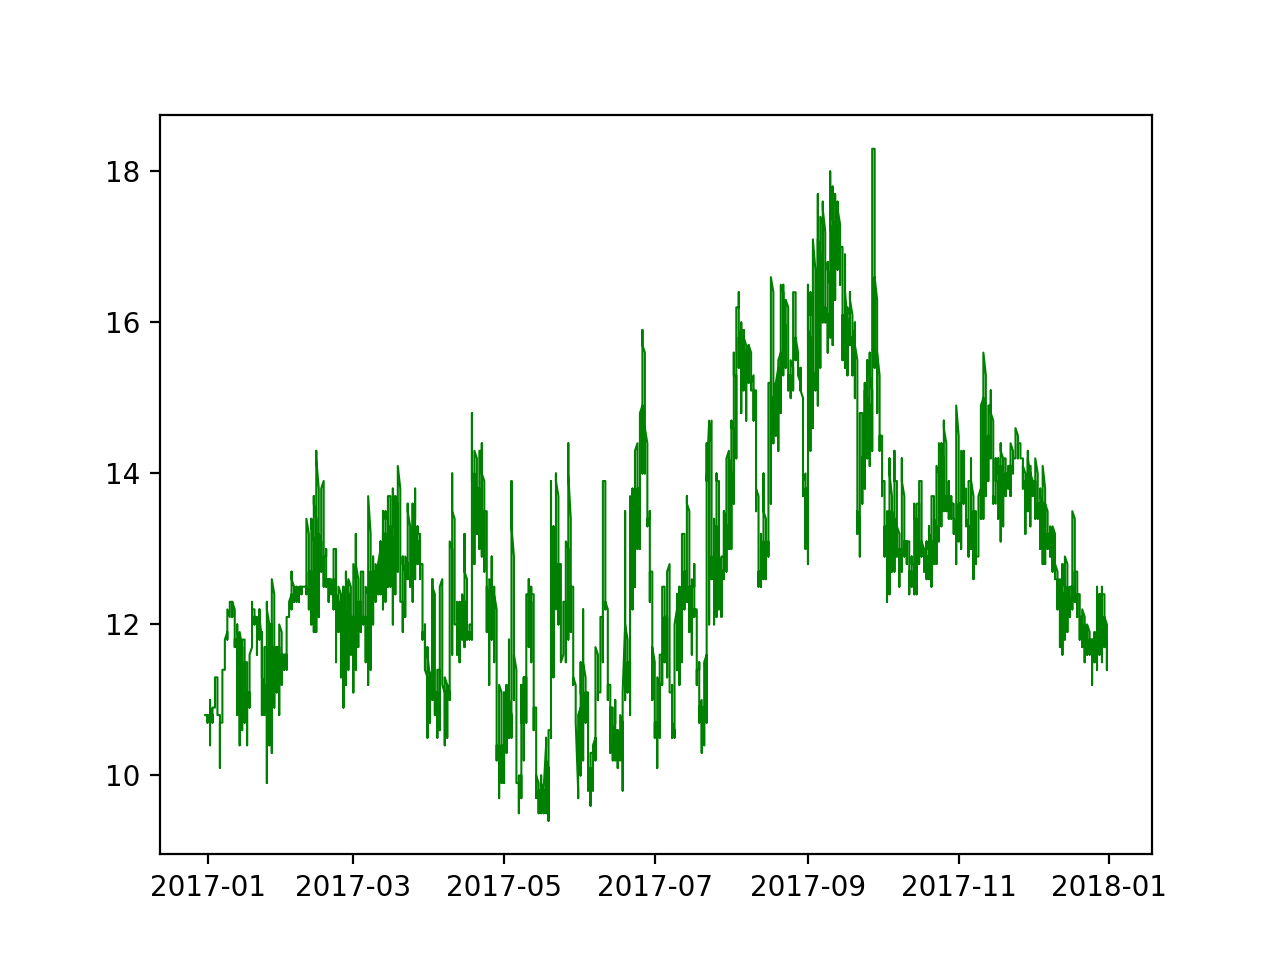

In [20]:
plt.figure()
plt.plot(time_sfos,temp_sfos,'g',linewidth=0.75)
#plt.plot(time_sfns,temp_sfns,'r',linewidth=0.75)

/anaconda3/lib/python3.7/site-packages/cartopy/io/img_tiles.py:320: UserWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  "The StamenTerrain class was deprecated in v0.17. "


<IPython.core.display.Javascript object>


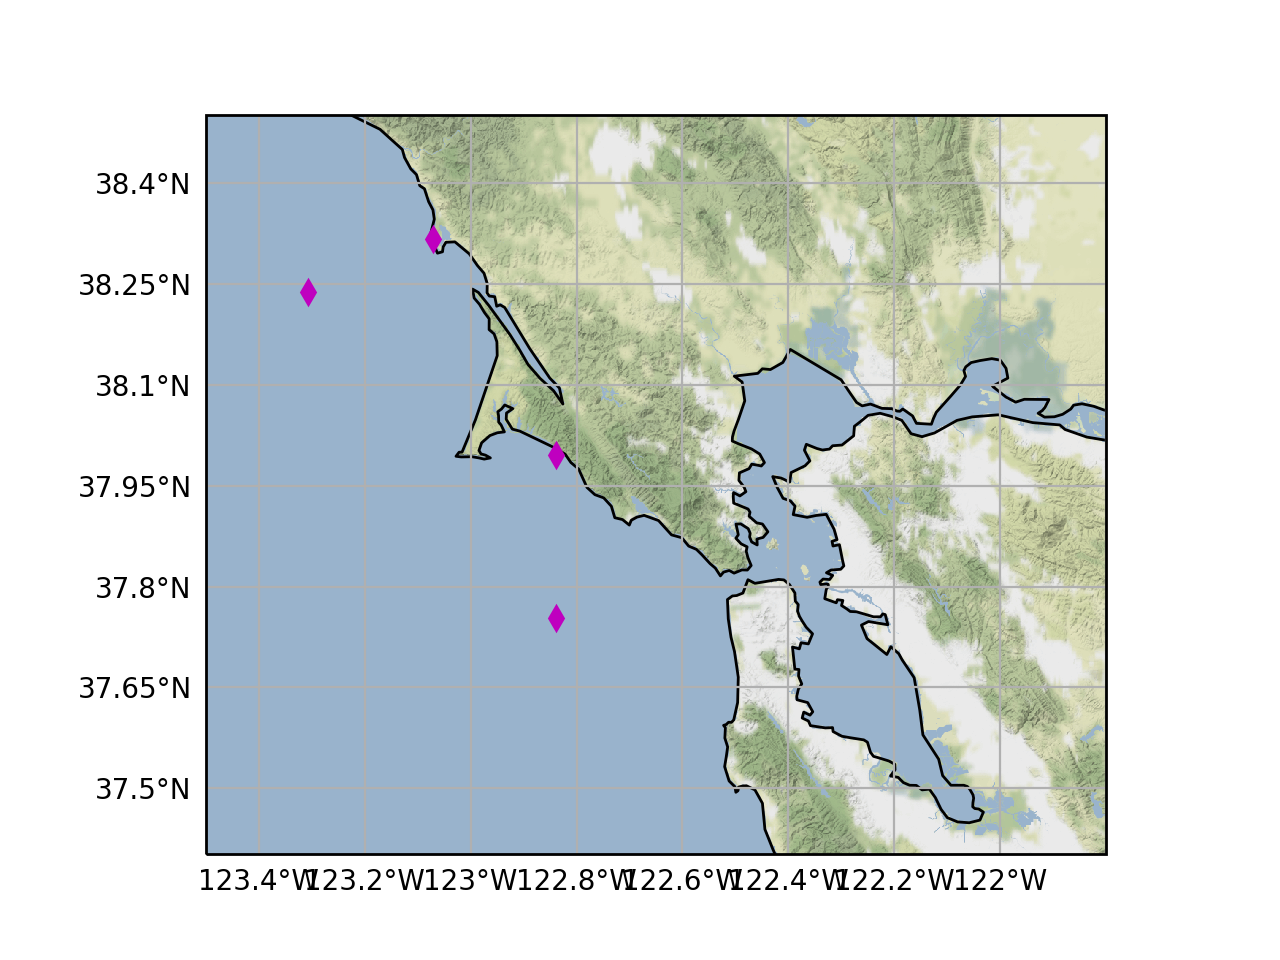

In [18]:
request = cigmt.StamenTerrain()

plt.figure()
ax = make_map(projection=request.crs)
ax.set_extent(GoF)
ax.add_image(request,10)
ax.coastlines('10m')

bbos_lat = 38.238
bbos_lon = -123.307
bbns_lat = 38.317
bbns_lon = -123.071
sfns_lat = 37.996
sfns_lon = -122.977
sfos_lat = 37.754
sfos_lon = -122.839
plt.plot(bbos_lon,bbos_lat,'md',transform=ccrs.PlateCarree())
plt.plot(bbns_lon,bbns_lat,'md',transform=ccrs.PlateCarree())
plt.plot(sfos_lon,sfns_lat,'md',transform=ccrs.PlateCarree())
plt.plot(sfos_lon,sfos_lat,'md',transform=ccrs.PlateCarree())